# 0. Preamble

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('/home/hosilva/tools/mplstyle/timesnromanstyle.mplstyle')

import lal, lalsimulation

from __future__ import unicode_literals

In [2]:
from postprocessing_tools import *

In [5]:
""" gaussian filter of histogram """
def gf(P):
  return filter.gaussian_filter(P, sigma=2.0)

### 1. dynamical Chern-Simons

Load our samples. 

Note: we use the suffix `j0` for no-spin corrections and `j1` for linear-in-spin corrections included.

In [3]:
# Path to events
path_to_GW200129 = "/home/hosilva/parspec/pe/GW200129/"
path_to_GW150914 = "/home/hosilva/parspec/pe/GW150914/"

data_GW200129_dcs_j0 = np.genfromtxt(path_to_GW200129 + "p4_l_df0_dtau0_CS_220124/" + "cbcBayes/posterior_samples.dat",           names=True, dtype=None)
data_GW200129_dcs_j1 = np.genfromtxt(path_to_GW200129 + "p4_l_df0_dtau0_df1_dtau1_CS_220215/" + "cbcBayes/posterior_samples.dat", names=True, dtype=None)

data_GW150914_dcs_j0 = np.genfromtxt(path_to_GW150914 + "parspec_runs/p4_l_df0_dtau0_CS_220203_1052/" + "cbcBayes/posterior_samples.dat",      names=True, dtype=None)
data_GW150914_dcs_j1 = np.genfromtxt(path_to_GW150914 + "parspec_runs/p4_l_df0_dtau0_df1_dtau1_CS_220215/" + "cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [4]:
GW200129_smp_l_j0, GW200129_smp_m1s_j0, GW200129_smp_m2s_j0, GW200129_smp_mfs_j0, GW200129_smp_z_j0 = read_relevant_columns(data_GW200129_dcs_j0)
GW200129_smp_l_j1, GW200129_smp_m1s_j1, GW200129_smp_m2s_j1, GW200129_smp_mfs_j1, GW200129_smp_z_j1 = read_relevant_columns(data_GW200129_dcs_j1)

GW150914_smp_l_j0, GW150914_smp_m1s_j0, GW150914_smp_m2s_j0, GW150914_smp_mfs_j0, GW150914_smp_z_j0 = read_relevant_columns(data_GW150914_dcs_j0)
GW150914_smp_l_j1, GW150914_smp_m1s_j1, GW150914_smp_m2s_j1, GW150914_smp_mfs_j1, GW150914_smp_z_j1 = read_relevant_columns(data_GW150914_dcs_j1)

In [ ]:
from pesummary.core.plots.bounded_1d_kde import Bounded_1d_kde
l_bins=np.linspace(0,60,1000)

x = [['A', 'A', 'A'],
     ['B', 'B', 'B'],
     ['C', 'C', 'C']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5, 5), gridspec_kw={'hspace': 0.4, 'wspace': 0.6, 'bottom':0.1})
plt.tight_layout()

clist = ["k", "#c77dff"]

for k in ('A', 'B', 'C'):
    axes[k].set_xlim(0, 60)
    axes[k].xaxis.set_ticks(np.arange(0, 60+10, 10))
    
for k in ('A', 'B'):
    axes[k].set_xticklabels([]);
    
axes['C'].set_xlabel(r'$\ell_{\rm CS}$ [km]');

#axes['A'].hist(GW150914_dcs_l,      density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
#axes['A'].hist(GW150914_spin_dcs_l, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");

kde=Bounded_1d_kde(GW150914_dcs_l,xlow=min(GW150914_dcs_l))
axes['A'].plot(l_bins,kde(l_bins),color=clist[0],label=r"$j=0$")

kde=Bounded_1d_kde(GW150914_spin_dcs_l,xlow=min(GW150914_spin_dcs_l))
axes['A'].plot(l_bins,kde(l_bins),color=clist[1],label=r"$j=0,1$")

axes['A'].set_ylim(0, 0.10);
axes['A'].yaxis.set_ticks([0, 0.05, 0.10]);
axes['A'].set_title("GW150914");
axes['A'].legend(loc='upper right', fontsize=9);
axes['A'].set_ylabel("PDF");

#axes['B'].hist(GW200129_dcs_l,      density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
#axes['B'].hist(GW200129_spin_dcs_l, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");

kde=Bounded_1d_kde(GW200129_dcs_l,xlow=min(GW200129_dcs_l))
axes['B'].plot(l_bins,kde(l_bins),color=clist[0],label=r"$j=0$")

kde=Bounded_1d_kde(GW200129_spin_dcs_l,xlow=min(GW200129_spin_dcs_l))
axes['B'].plot(l_bins,kde(l_bins),color=clist[1],label=r"$j=0,1$")

axes['B'].set_ylim(0, 0.10);
axes['B'].yaxis.set_ticks([0, 0.05, 0.10]);
axes['B'].set_title("GW200129");
axes['B'].legend(loc='upper right', fontsize=9);
axes['B'].set_ylabel("PDF");

axes['C'].set_title("Combined events");
axes['C'].xaxis.set_ticks(np.arange(0, 60+10, 10))
axes['C'].set_ylabel("PDF");
# axes['C'].plot(dcs_l_combined, y_dcs_l_combined, '-',  label=r"$j=0$")
# axes['C'].plot(dcs_l_spin_combined, y_dcs_l_spin_combined, '--', label=r"$j=0,1$")
axes['C'].plot(dcs_l_vals, dcs_combined_pdf_normalized_vals, color=clist[0],  label=r"$j=0$")
axes['C'].plot(dcs_spin_l_vals, dcs_spin_combined_pdf_normalized_vals, color=clist[1], label=r"$j=0,1$")
axes['C'].legend(loc='upper right', fontsize=9);
axes['C'].set_ylim(0, 0.10);
axes['C'].yaxis.set_ticks([0, 0.05, 0.10]);

plt.savefig('fig_output/dcs_posteriors_combined.pdf')

In [10]:
# Don't need to run this again
# Generate joint posterior
GW200129_kde_x_j0, GW200129_kde_l_j0 = get_kde_l(GW200129_smp_l_j0)
GW200129_kde_x_j1, GW200129_kde_l_j1 = get_kde_l(GW200129_smp_l_j1)

GW150914_kde_x_j0, GW150914_kde_l_j0 = get_kde_l(GW150914_smp_l_j0)
GW150914_kde_x_j1, GW150914_kde_l_j1 = get_kde_l(GW150914_smp_l_j1)

In [11]:
# Don't need to run this again
joint_kde_x_j0, joint_kde_y_j0 = do_posterior_combine(GW150914_kde_x_j0, GW150914_kde_l_j0, [0, 60.], 
                                                      GW200129_kde_x_j0, GW200129_kde_l_j0, [0, 60.])

joint_kde_x_j1, joint_kde_y_j1 = do_posterior_combine(GW150914_kde_x_j1, GW150914_kde_l_j1, [0, 60.], 
                                                      GW200129_kde_x_j1, GW200129_kde_l_j1, [0, 60.])



In [18]:
# ----
# Save
# ----
# np.savetxt('kde_dcs/GW200129_dcs_kde_j0.dat', np.c_[GW200129_kde_x_j0, GW200129_kde_l_j0], fmt = ['%.4f', '%.4e'], delimiter = '\t')
# np.savetxt('kde_dcs/GW200129_dcs_kde_j1.dat', np.c_[GW200129_kde_x_j1, GW200129_kde_l_j1], fmt = ['%.4f', '%.4e'], delimiter = '\t')
# np.savetxt('kde_dcs/GW150914_dcs_kde_j0.dat', np.c_[GW150914_kde_x_j0, GW150914_kde_l_j0], fmt = ['%.4f', '%.4e'], delimiter = '\t')
# np.savetxt('kde_dcs/GW150914_dcs_kde_j1.dat', np.c_[GW150914_kde_x_j1, GW150914_kde_l_j1], fmt = ['%.4f', '%.4e'], delimiter = '\t')

# np.savetxt('kde_dcs/joint_dcs_kde_j0.dat', np.c_[joint_kde_x_j0, joint_kde_y_j0], fmt = ['%.4f', '%.4e'], delimiter = '\t')
# np.savetxt('kde_dcs/joint_dcs_kde_j1.dat', np.c_[joint_kde_x_j1, joint_kde_y_j1], fmt = ['%.4f', '%.4e'], delimiter = '\t')

# ----
# Load
# ----
joint_dcs_kde_j0 = np.loadtxt('kde_dcs/joint_dcs_kde_j0.dat', unpack=True)
joint_dcs_kde_j1 = np.loadtxt('kde_dcs/joint_dcs_kde_j1.dat', unpack=True)

/local/tmp/hosilva/ipykernel_843503/1678787031.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


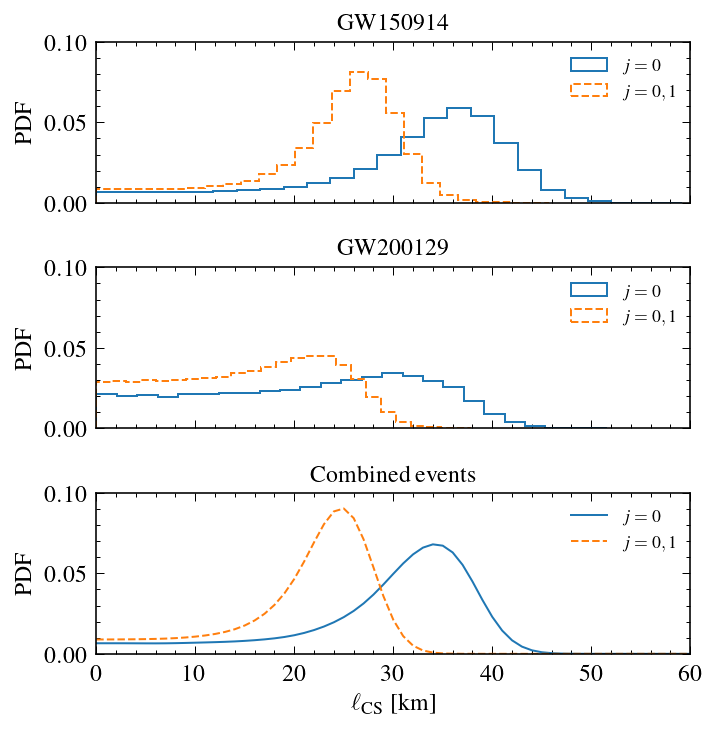

In [21]:
x = [['A', 'A', 'A'],
     ['B', 'B', 'B'],
     ['C', 'C', 'C']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5, 5), gridspec_kw={'hspace': 0.4, 'wspace': 0.6, 'bottom':0.1})
plt.tight_layout()

for k in ('A', 'B', 'C'):
    axes[k].set_xlim(0, 60)
    axes[k].xaxis.set_ticks(np.arange(0, 60+10, 10))
    
for k in ('A', 'B'):
    axes[k].set_xticklabels([]);
    
axes['C'].set_xlabel(r'$\ell_{\rm CS}$ [km]');

axes['A'].hist(GW150914_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
axes['A'].hist(GW150914_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['A'].set_ylim(0, 0.10);
axes['A'].yaxis.set_ticks([0, 0.05, 0.10]);
axes['A'].set_title("GW150914");
axes['A'].legend(loc='upper right', fontsize=9);
axes['A'].set_ylabel("PDF");

axes['B'].hist(GW200129_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
axes['B'].hist(GW200129_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['B'].set_ylim(0, 0.10);
axes['B'].yaxis.set_ticks([0, 0.05, 0.10]);
axes['B'].set_title("GW200129");
axes['B'].legend(loc='upper right', fontsize=9);
axes['B'].set_ylabel("PDF");

axes['C'].set_title("Combined events");
axes['C'].xaxis.set_ticks(np.arange(0, 60+10, 10))
axes['C'].set_ylabel("PDF");
axes['C'].plot(joint_dcs_kde_j0[0], joint_dcs_kde_j0[1], '-',  label=r"$j=0$")
axes['C'].plot(joint_dcs_kde_j1[0], joint_dcs_kde_j1[1], '--', label=r"$j=0,1$")
axes['C'].legend(loc='upper right', fontsize=9);
axes['C'].set_ylim(0, 0.10);
axes['C'].yaxis.set_ticks([0, 0.05, 0.10]);

plt.savefig('fig_output/dcs_posteriors_combined.pdf')

### 2. Einstein-dilaton-Gauss-Bonnet

In [11]:
data_GW150914_edgb_j0 = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/p4_l_df0_dtau0_GB_220227/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW200129_edgb_j0 = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW200129/p4_l_df0_dtau0_GB/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [12]:
data_GW150914_edgb_j1 = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW150914/p4_l_df0_dtau0_spin_GB/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW200129_edgb_j1 = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW200129/p4_l_df0_dtau0_spin_GB/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [13]:
GW150914_smp_l_j0, GW150914_smp_m1s_j0, GW150914_smp_m2s_j0, GW150914_smp_mfs_j0, GW150914_smp_z_j0 = read_relevant_columns(data_GW150914_edgb_j0)
GW200129_smp_l_j0, GW200129_smp_m1s_j0, GW200129_smp_m2s_j0, GW200129_smp_mfs_j0, GW200129_smp_z_j0 = read_relevant_columns(data_GW200129_edgb_j0)

In [14]:
GW150914_smp_l_j1, GW150914_smp_m1s_j1, GW150914_smp_m2s_j1, GW150914_smp_mfs_j1, GW150914_smp_z_j1 = read_relevant_columns(data_GW150914_edgb_j1)
GW200129_smp_l_j1, GW200129_smp_m1s_j1, GW200129_smp_m2s_j1, GW200129_smp_mfs_j1, GW200129_smp_z_j1 = read_relevant_columns(data_GW200129_edgb_j1)

In [15]:
print(len(GW150914_smp_l_j0), len(GW200129_smp_l_j0))
print(len(GW150914_smp_l_j1), len(GW200129_smp_l_j1))

42796 29353
36126 26872


In [49]:
# Don't need to run this again
# # Generate joint posterior
# GW200129_kde_x_j0, GW200129_kde_l_j0 = get_kde_l(GW200129_smp_l_j0)
# GW150914_kde_x_j0, GW150914_kde_l_j0 = get_kde_l(GW150914_smp_l_j0)
GW150914_kde_x_j1, GW150914_kde_l_j1 = get_kde_l(GW150914_smp_l_j1)

# # Don't need to run this again
# joint_kde_x_j0, joint_kde_y_j0 = do_posterior_combine(GW150914_kde_x_j0, GW150914_kde_l_j0, [0, 300.], 
#                                                       GW200129_kde_x_j0, GW200129_kde_l_j0, [0, 300.])

# ----
# Save
# ----
np.savetxt('kde_edgb/GW200129_edgb_kde_j0.dat', np.c_[GW200129_kde_x_j0, GW200129_kde_l_j0], fmt = ['%.4f', '%.4e'], delimiter = '\t')
np.savetxt('kde_edgb/GW150914_edgb_kde_j0.dat', np.c_[GW150914_kde_x_j0, GW150914_kde_l_j0], fmt = ['%.4f', '%.4e'], delimiter = '\t')
np.savetxt('kde_edgb/GW150914_edgb_kde_j1.dat', np.c_[GW150914_kde_x_j1, GW150914_kde_l_j1], fmt = ['%.4f', '%.4e'], delimiter = '\t')
np.savetxt('kde_edgb/joint_edgb_kde_j0.dat', np.c_[joint_kde_x_j0, joint_kde_y_j0], fmt = ['%.4f', '%.4e'], delimiter = '\t')

# ----
# Load
# ----
joint_edgb_kde_j0 = np.loadtxt('kde_edgb/joint_edgb_kde_j0.dat', unpack=True)

/local/tmp/hosilva/ipykernel_1263001/1966364030.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


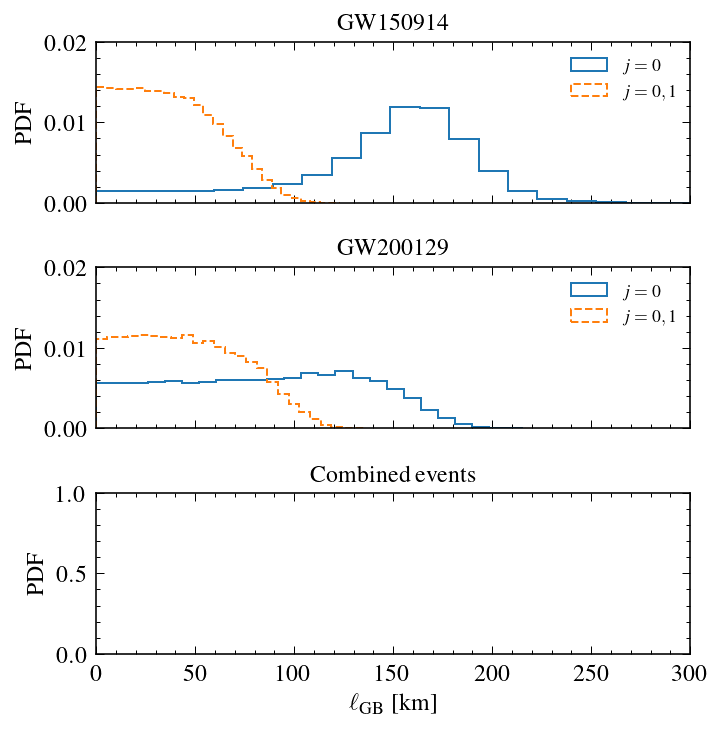

In [16]:
x = [['A', 'A', 'A'],
     ['B', 'B', 'B'],
     ['C', 'C', 'C']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5, 5), gridspec_kw={'hspace': 0.4, 'wspace': 0.6, 'bottom':0.1})
plt.tight_layout()

for k in ('A', 'B', 'C'):
    xmax = 300
    dx = 50
    axes[k].set_xlim(0, xmax)
    axes[k].xaxis.set_ticks(np.arange(0, xmax+dx, dx))
for k in ('A', 'B'):
    axes[k].set_ylim(0, 0.02);
    axes[k].yaxis.set_ticks([0, 0.01, 0.02]);
    
for k in ('A', 'B'):
    axes[k].set_xticklabels([]);
    
axes['C'].set_xlabel(r'$\ell_{\rm GB}$ [km]');

axes['A'].hist(GW150914_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
axes['A'].hist(GW150914_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['A'].set_title("GW150914");
axes['A'].legend(loc='upper right', fontsize=9);
axes['A'].set_ylabel("PDF");

axes['B'].hist(GW200129_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
axes['B'].hist(GW200129_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['B'].set_title("GW200129");
axes['B'].legend(loc='upper right', fontsize=9);
axes['B'].set_ylabel("PDF");

axes['C'].set_title("Combined events");
# axes['C'].xaxis.set_ticks(np.arange(0, 200+10, 10))
axes['C'].set_ylabel("PDF");
# axes['C'].plot(joint_edgb_kde_j0[0], joint_edgb_kde_j0[1], '-',  label=r"$j=0$")
# axes['C'].plot(joint_edgb_kde_j1[0], joint_edgb_kde_j1[1], '--', label=r"$j=0,1$")
axes['C'].legend(loc='upper right', fontsize=9);

plt.savefig('fig_output/edgb_posteriors_combined.pdf')

### 3. Effective-field-theory of GR

In [3]:
data_GW200129_ceft_j0 = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW200129/p4_l_df0_dtau0_EFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_ceft_j0 = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW150914/p4_l_df0_dtau0_EFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [46]:
# data_GW150914_edgb_j1 = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW150914/p4_l_df0_dtau0_spin_GB/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [4]:
GW200129_smp_l_j0, GW200129_smp_m1s_j0, GW200129_smp_m2s_j0, GW200129_smp_mfs_j0, GW200129_smp_z_j0 = read_relevant_columns(data_GW200129_ceft_j0)
GW150914_smp_l_j0, GW150914_smp_m1s_j0, GW150914_smp_m2s_j0, GW150914_smp_mfs_j0, GW150914_smp_z_j0 = read_relevant_columns(data_GW150914_ceft_j0)

In [47]:
# GW150914_smp_l_j1, GW150914_smp_m1s_j1, GW150914_smp_m2s_j1, GW150914_smp_mfs_j1, GW150914_smp_z_j1 = read_relevant_columns(data_GW150914_edgb_j1)

In [5]:
print(len(GW200129_smp_l_j0), len(GW150914_smp_l_j0))
# print(len(GW200129_smp_l_j1), len(GW150914_smp_l_j1))

26997 16848


/local/tmp/hosilva/ipykernel_1263001/3547103031.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


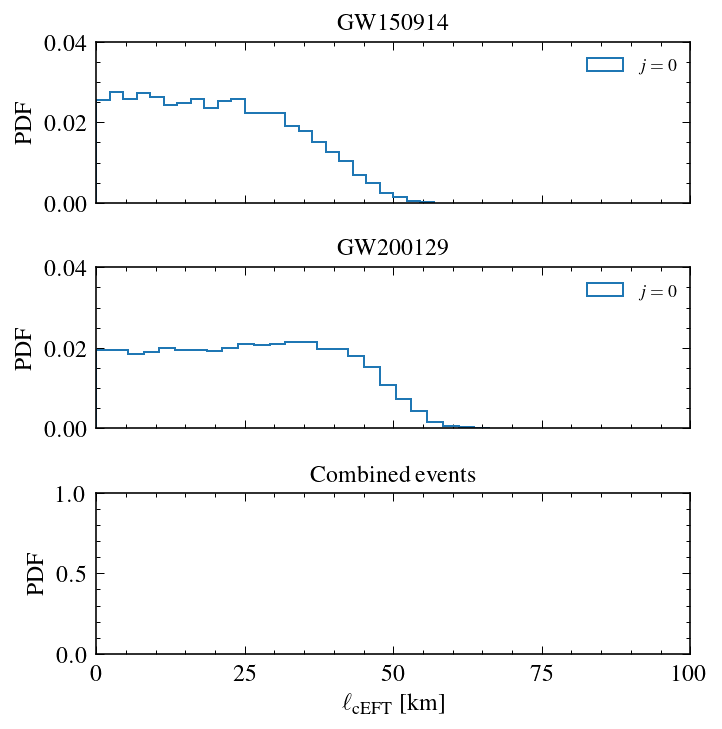

In [10]:
x = [['A', 'A', 'A'],
     ['B', 'B', 'B'],
     ['C', 'C', 'C']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5, 5), gridspec_kw={'hspace': 0.4, 'wspace': 0.6, 'bottom':0.1})
plt.tight_layout()

for k in ('A', 'B', 'C'):
    xmax = 100
    dx = 25
    axes[k].set_xlim(0, xmax)
    axes[k].xaxis.set_ticks(np.arange(0, xmax+dx, dx))
for k in ('A', 'B'):
    axes[k].set_ylim(0, 0.04);
    axes[k].yaxis.set_ticks([0, 0.02, 0.04]);
    
for k in ('A', 'B'):
    axes[k].set_xticklabels([]);
    
axes['C'].set_xlabel(r'$\ell_{\rm cEFT}$ [km]');

axes['A'].hist(GW150914_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
# axes['A'].hist(GW150914_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['A'].set_title("GW150914");
axes['A'].legend(loc='upper right', fontsize=9);
axes['A'].set_ylabel("PDF");

axes['B'].hist(GW200129_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
# axes['B'].hist(GW200129_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['B'].set_title("GW200129");
axes['B'].legend(loc='upper right', fontsize=9);
axes['B'].set_ylabel("PDF");

axes['C'].set_title("Combined events");
axes['C'].set_ylabel("PDF");
axes['C'].legend(loc='upper right', fontsize=9);

plt.savefig('fig_output/ceft_posteriors_combined.pdf')

/local/tmp/hosilva/ipykernel_843503/1027924526.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


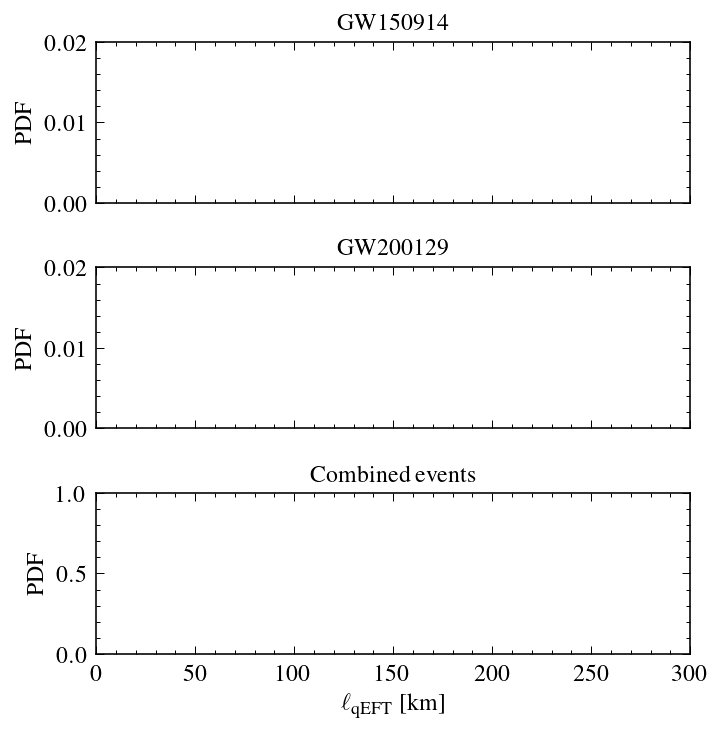

In [60]:
x = [['A', 'A', 'A'],
     ['B', 'B', 'B'],
     ['C', 'C', 'C']]

f, axes = plt.subplot_mosaic(mosaic=x, figsize=(5, 5), gridspec_kw={'hspace': 0.4, 'wspace': 0.6, 'bottom':0.1})
plt.tight_layout()

for k in ('A', 'B', 'C'):
    xmax = 300
    dx = 50
    axes[k].set_xlim(0, xmax)
    axes[k].xaxis.set_ticks(np.arange(0, xmax+dx, dx))
for k in ('A', 'B'):
    axes[k].set_ylim(0, 0.02);
    axes[k].yaxis.set_ticks([0, 0.01, 0.02]);
    
for k in ('A', 'B'):
    axes[k].set_xticklabels([]);
    
axes['C'].set_xlabel(r'$\ell_{\rm qEFT}$ [km]');

# axes['A'].hist(GW150914_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
# axes['A'].hist(GW150914_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['A'].set_title("GW150914");
axes['A'].legend(loc='upper right', fontsize=9);
axes['A'].set_ylabel("PDF");

# axes['B'].hist(GW200129_smp_l_j0, density=True, histtype='step', bins=25, ls='-',  label=r"$j=0$");
# axes['B'].hist(GW200129_smp_l_j1, density=True, histtype='step', bins=25, ls='--', label=r"$j=0,1$");
axes['B'].set_title("GW200129");
axes['B'].legend(loc='upper right', fontsize=9);
axes['B'].set_ylabel("PDF");

axes['C'].set_title("Combined events");
axes['C'].set_ylabel("PDF");
axes['C'].legend(loc='upper right', fontsize=9);

plt.savefig('fig_output/qeft_posteriors_combined.pdf')

#### Comparison after correction

In [3]:
data_GW150914_ceft_j0_ag = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW150914/p4_l_df0_dtau0_EFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_ceft_j0_hs = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/p4_l_df0_dtau0_cEFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [4]:
smp_l_j0_err, _, _, _, _ = read_relevant_columns(data_GW150914_ceft_j0_ag)
smp_l_j0_cor, _, _, _, _ = read_relevant_columns(data_GW150914_ceft_j0_hs)

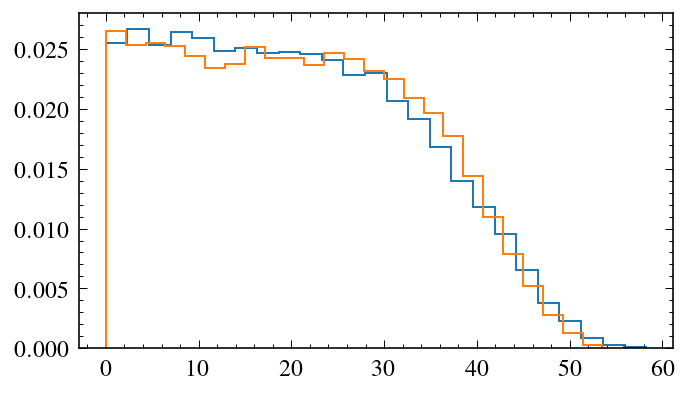

In [5]:
plt.hist(smp_l_j0_err, density=True, histtype='step', bins=25, ls='-',  label=r"Incorrect");
plt.hist(smp_l_j0_cor, density=True, histtype='step', bins=25, ls='-',  label=r"Correct");

In [6]:
print(len(smp_l_j0_cor), len(smp_l_j0_err))

22938 42044


In [11]:
data_GW200129_ceft_j0_ag = np.genfromtxt("/home/abhirup.ghosh/Documents/Work/spinqnm/runs/parspec/GW200129/p4_l_df0_dtau0_EFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW200129_ceft_j0_hs = np.genfromtxt("/home/hosilva/parspec/pe/GW200129/p4_l_df0_dtau0_cEFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW200129_ceft_j0_hs2 = np.genfromtxt("/home/hosilva/parspec/pe/GW200129/p4_l_df0_dtau0_cEFT_alphaNGRmax_60/cbcBayes/posterior_samples.dat", names=True, dtype=None)

(0.0, 80.0)

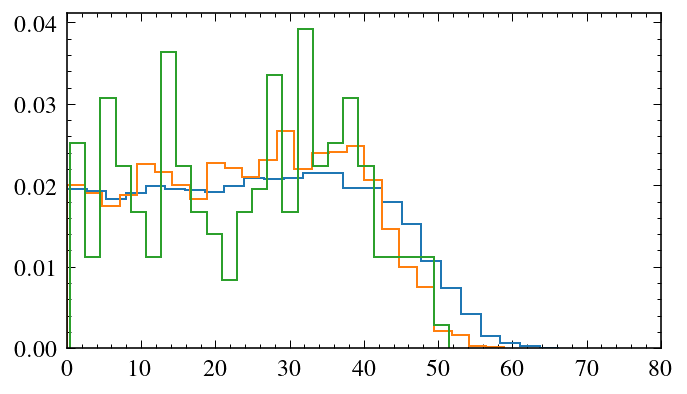

In [17]:
smp_l_j0_err, _, _, _, _ = read_relevant_columns(data_GW200129_ceft_j0_ag)
smp_l_j0_cor, _, _, _, _ = read_relevant_columns(data_GW200129_ceft_j0_hs)
smp_l_j0_cor_sprior, _, _, _, _ = read_relevant_columns(data_GW200129_ceft_j0_hs2)

plt.hist(smp_l_j0_err, density=True, histtype='step', bins=25, ls='-',  label=r"Incorrect");
plt.hist(smp_l_j0_cor, density=True, histtype='step', bins=25, ls='-',  label=r"Correct");
plt.hist(smp_l_j0_cor_sprior, density=True, histtype='step', bins=25, ls='-',  label=r"Correct");
plt.xlim(0, 80)

In [11]:
smp_l_j0_cor_sprior.max()

51.518342295738734

In [19]:
print(len(smp_l_j0_cor), len(smp_l_j0_err))

2615 26997


In [7]:
data_GW150914_ceft_j1_hs = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/p4_l_df0_dtau0_df1_dtau1_cEFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW200129_ceft_j1_hs = np.genfromtxt("/home/hosilva/parspec/pe/GW200129/p4_l_df0_dtau0_df1_dtau1_cEFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [8]:
smp_l_j0_cor, _, _, _, _ = read_relevant_columns(data_GW150914_ceft_j0_hs)
smp_l_j1_cor, _, _, _, _ = read_relevant_columns(data_GW150914_ceft_j1_hs)

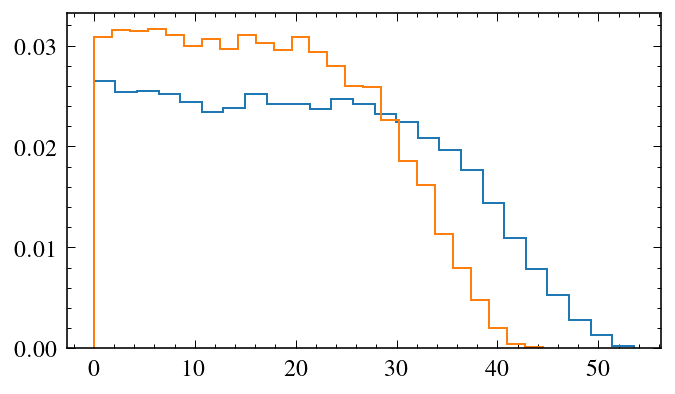

In [9]:
plt.hist(smp_l_j0_cor, density=True, histtype='step', bins=25, ls='-');
plt.hist(smp_l_j1_cor, density=True, histtype='step', bins=25, ls='-');

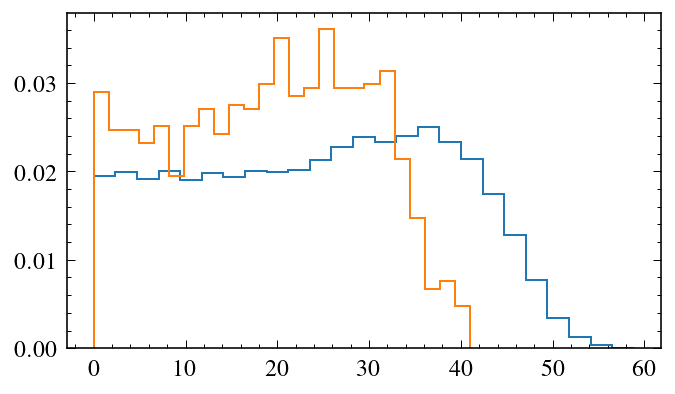

In [12]:
smp_l_j0_cor, _, _, _, _ = read_relevant_columns(data_GW200129_ceft_j0_hs)
smp_l_j1_cor, _, _, _, _ = read_relevant_columns(data_GW200129_ceft_j1_hs)

plt.hist(smp_l_j0_cor, density=True, histtype='step', bins=25, ls='-');
plt.hist(smp_l_j1_cor, density=True, histtype='step', bins=25, ls='-');

In [13]:
len(smp_l_j1_cor)

1288